## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Student name:  ESTHER MUKAMI NJAGI
* Student pace: part time 
* Scheduled project review date/time: march -2024 
* Instructor name: ASHA DEEN
* Blog post URL:

In [82]:
# Your code here - remember to use markdown cells for comments as well!

Investigate the film industry to gain sufficient understanding of what attributes to success and in turn utilize this analysis to create actionable recommendations for industry entry.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy.stats import pearsonr
%matplotlib inline

In [84]:
import pandas as pd

# Read the first CSV file into a DataFrame
movie_csv_df = pd.read_csv('zippedData/tmdb.movies.csv/tmdb.movies.csv')

# Read the second CSV file into a DataFrame
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv/bom.movie_gross.csv')

# Read the third CSV file into a DataFrame
movie_budgetcsv_df = pd.read_csv('zippedData/tn.movie_budgets.csv/tn.movie_budgets.csv')

# Read the fourth CSV file into DataFrame
rt_reviews_tsv_df = pd.read_csv('zippedData/rt.reviews.tsv/rt.reviews.tsv', delimiter='\t',encoding='latin1')

# Read the fifth CSV file into DataFrame
rt_movie_info_tsv_df = pd.read_csv('zippedData/rt.movie_info.tsv/rt.movie_info.tsv', delimiter='\t')

print(movie_csv_df)
print(movie_gross_df)
print(movie_budgetcsv_df)
print(rt_reviews_tsv_df)
print(rt_movie_info_tsv_df)



       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      

In [85]:
#First remove any movies that had a $0 domestic gross.
movie_budgetcsv_df = movie_budgetcsv_df[movie_budgetcsv_df['domestic_gross'] !=0]

Lets preview the head of each dataframe

In [86]:
movie_csv_df.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [87]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [88]:
movie_budgetcsv_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [89]:
rt_reviews_tsv_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [90]:
rt_movie_info_tsv_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Data cleaning
-to check missing values
-duplicates
-Verify and correct data types if necessary.

In [91]:


# Function to perform data cleaning
def data_cleaning(df, df_name):
    print(f"\n{df_name} DataFrame:")
    
    # Handling Missing Values
    print("\nMissing values before handling:")
    print(df.isnull().sum())
    
    # Handling Duplicates
    print("\nNumber of duplicate rows before removal:", df.duplicated().sum())
    df.drop_duplicates(inplace=True)
    
    # Verify and Correct Data Types
    print("\nData types before correction:")
    print(df.dtypes)
    
    
    # Final check after data cleaning
    print("\nMissing values after handling:")
    print(df.isnull().sum())
    print("\nNumber of duplicate rows after removal:", df.duplicated().sum())
    print("\nData types after correction:")
    print(df.dtypes)

# Perform data cleaning for each DataFrame
data_cleaning(movie_csv_df, "Movie CSV")
data_cleaning(movie_gross_df, "Movie Gross")
data_cleaning(movie_budgetcsv_df, "Movie Budgets")
data_cleaning(rt_reviews_tsv_df, "Rotten Tomatoes Reviews")
data_cleaning(rt_movie_info_tsv_df, "Rotten Tomatoes Movie Info")






Movie CSV DataFrame:

Missing values before handling:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Number of duplicate rows before removal: 0

Data types before correction:
Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

Missing values after handling:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Number of duplicate rows after removal: 0

Data

Calculate the reviews of each publisher

In [100]:
# Grouping the reviews DataFrame by publisher and counting the number of reviews
reviews_count = rt_reviews_tsv_df.groupby('publisher').size().reset_index(name='reviews_count')

# Display the DataFrame with publisher and their corresponding number of reviews
print(reviews_count)


                 publisher  reviews_count
0      2UE That Movie Show             20
1                      3AW             42
2      3BlackChicks Review             39
3                 48 Hills              2
4                 4Columns              2
...                    ...            ...
1276        thelondonpaper              5
1277       tonymacklin.net             26
1278        tonymedley.com             43
1279      www.kcactive.com              7
1280  www.susangranger.com             82

[1281 rows x 2 columns]


grouping the reviews DataFrame by date, rating, and publisher 

In [101]:
# Grouping the reviews DataFrame by date, rating , and publisher 

reviews_count = rt_reviews_tsv_df.groupby(['date', 'rating', 'publisher','review']).size().reset_index(name='reviews_count')


# Display the DataFrame with review details
print(reviews_count)



                    date rating              publisher  \
0          April 1, 1993     B+   Entertainment Weekly   
1          April 1, 2001  3.5/4        eFilmCritic.com   
2          April 1, 2001    3/4  Film Written Magazine   
3          April 1, 2001    3/4    Laramie Movie Scope   
4          April 1, 2001    3/4     TheMovieReport.com   
...                  ...    ...                    ...   
35062  September 9, 2016   7/10    We Got This Covered   
35063  September 9, 2017   6/10            ScreenCrush   
35064  September 9, 2018     B+     ABC Radio Brisbane   
35065  September 9, 2018     B+         The Film Stage   
35066  September 9, 2018     B-                AV Club   

                                                  review  reviews_count  
0      Old baseball wisdom: The best teams win with s...              1  
1          Norton's performance is just shy of brilliant              1  
2      See it, enjoy it, and remind yourself why havi...              1  
3      

Use the scatter graph create a data visualisation to show the relationship between release date and rating

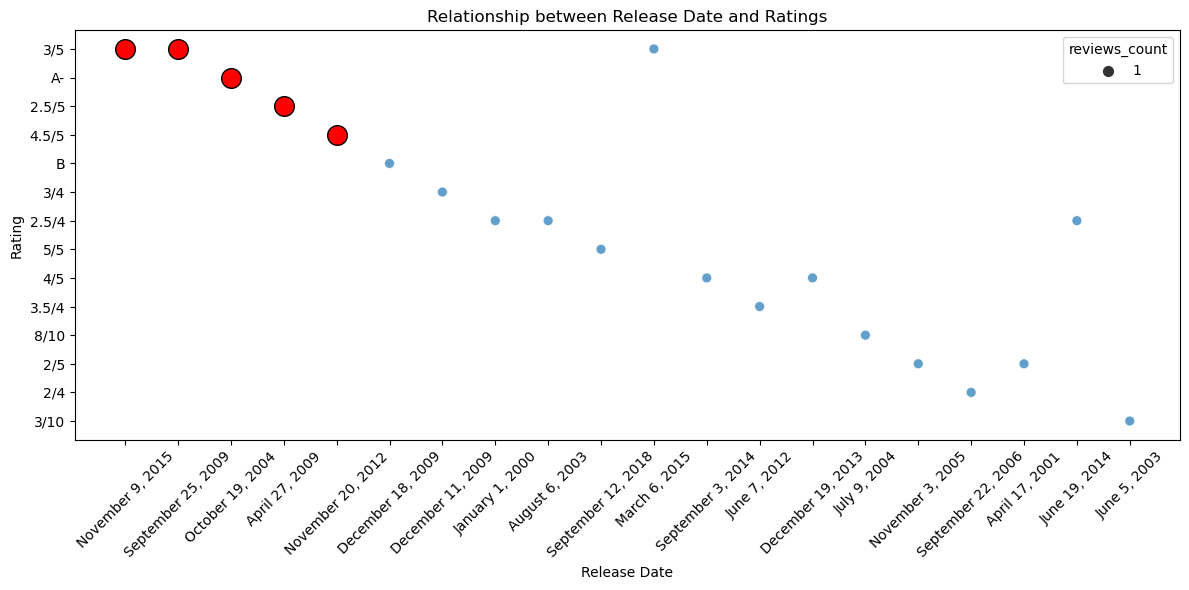

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Downsample data to ensure maximum of 20 unique data points for 'date' and 'reviews_count'
downsampled_data = reviews_count.sample(n=min(20, len(reviews_count)), random_state=42)

# Assuming 'date' column contains release dates and 'rating' column contains ratings
# Creating a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=downsampled_data, x='date', y='rating', size='reviews_count', sizes=(50, 250), alpha=0.7)
plt.title('Relationship between Release Date and Ratings')
plt.xlabel('Release Date')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()

# Marking the highest points with red color
highest_points = downsampled_data.nlargest(5, 'reviews_count')
for _, row in highest_points.iterrows():
    plt.scatter(row['date'], row['rating'], s=200, color='red', edgecolors='black', zorder=10)

plt.show()


In [ ]:
calculate the type of coorelation

In [102]:
# Calculate the total number of ratings
total_ratings = rt_reviews_tsv_df['rating'].count()

print("Total number of ratings:", total_ratings)


Total number of ratings: 40907


A graph showing the correlation between publisher and movie ratings

# Question 2:calculate the movie with the highest popularity,write its title &genre.
using movie_csv_df , title ,release_date ,popularity,genre_ids

In [ ]:
# Print the selected columns from the DataFrame
selected_columns = ['popularity', 'title', 'genre_ids']
print(movie_csv_df[selected_columns])


       popularity                                         title  \
0          33.533  Harry Potter and the Deathly Hallows: Part 1   
1          28.734                      How to Train Your Dragon   
2          28.515                                    Iron Man 2   
3          28.005                                     Toy Story   
4          27.920                                     Inception   
...           ...                                           ...   
26512       0.600                         Laboratory Conditions   
26513       0.600                               _EXHIBIT_84xxx_   
26514       0.600                                  The Last One   
26515       0.600                                  Trailer Made   
26516       0.600                                    The Church   

                 genre_ids  
0          [12, 14, 10751]  
1      [14, 12, 16, 10751]  
2            [12, 28, 878]  
3          [16, 35, 10751]  
4            [28, 878, 12]  
...                  

In [ ]:
# Find the index of the movie with the highest popularity
highest_popularity_index = movie_csv_df['popularity'].idxmax()

# Get the title, popularity, and genre_ids of the movie with the highest popularity
highest_popularity_movie = movie_csv_df.loc[highest_popularity_index, ['original_title', 'popularity', 'genre_ids']]

# Print the title, popularity, and genre_ids of the movie with the highest popularity
print("Movie with the highest popularity:")
print("Title:", highest_popularity_movie['original_title'])
print("Popularity:", highest_popularity_movie['popularity'])



Movie with the highest popularity:
Title: Avengers: Infinity War
Popularity: 80.773


using the data frame movie_csv_df ,print columns with 'titles' ,vote_count

In [ ]:

# Print the selected columns from the DataFrame
selected_columns = ['vote_count', 'title']
print(movie_csv_df[selected_columns])


       vote_count                                         title
0           10788  Harry Potter and the Deathly Hallows: Part 1
1            7610                      How to Train Your Dragon
2           12368                                    Iron Man 2
3           10174                                     Toy Story
4           22186                                     Inception
...           ...                                           ...
26512           1                         Laboratory Conditions
26513           1                               _EXHIBIT_84xxx_
26514           1                                  The Last One
26515           1                                  Trailer Made
26516           1                                    The Church

[26517 rows x 2 columns]


create a graph to show movie titles with the highest vote_count

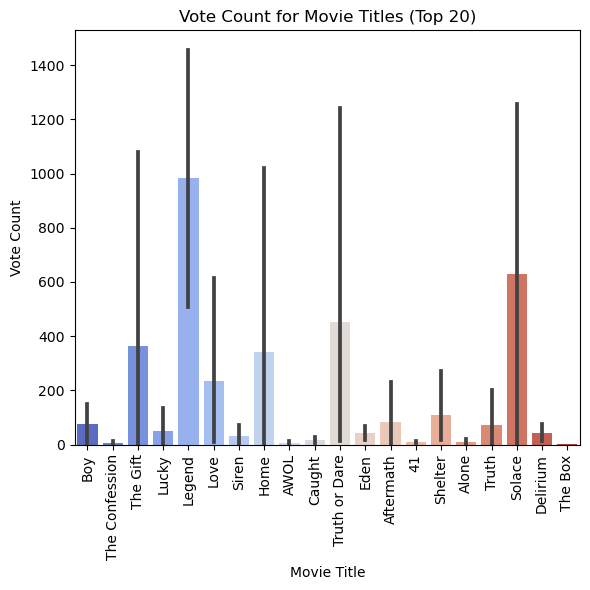

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find the movie with the highest vote count
highest_vote_movie = movie_csv_df.loc[movie_csv_df['vote_count'].idxmax()]

# Get the top 20 movie titles
top_movie_titles = movie_csv_df['title'].value_counts().head(20).index

# Filter the DataFrame to contain only the top 20 movie titles
top_20_movies_df = movie_csv_df[movie_csv_df['title'].isin(top_movie_titles)]

# Set the size of the plot
plt.figure(figsize=(6, 6))

# Create a bar plot
sns.barplot(data=top_20_movies_df, x='title', y='vote_count', palette='coolwarm')

# Highlight the movie with the highest vote count in brown
for bar in plt.gca().patches:
    if bar.get_height() == highest_vote_movie['vote_count']:
        bar.set_facecolor('brown')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Vote Count for Movie Titles (Top 20)')
plt.xlabel('Movie Title')
plt.ylabel('Vote Count')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
Make a graph showing which 'title' compared to 'popularity' in the movie_csv_df

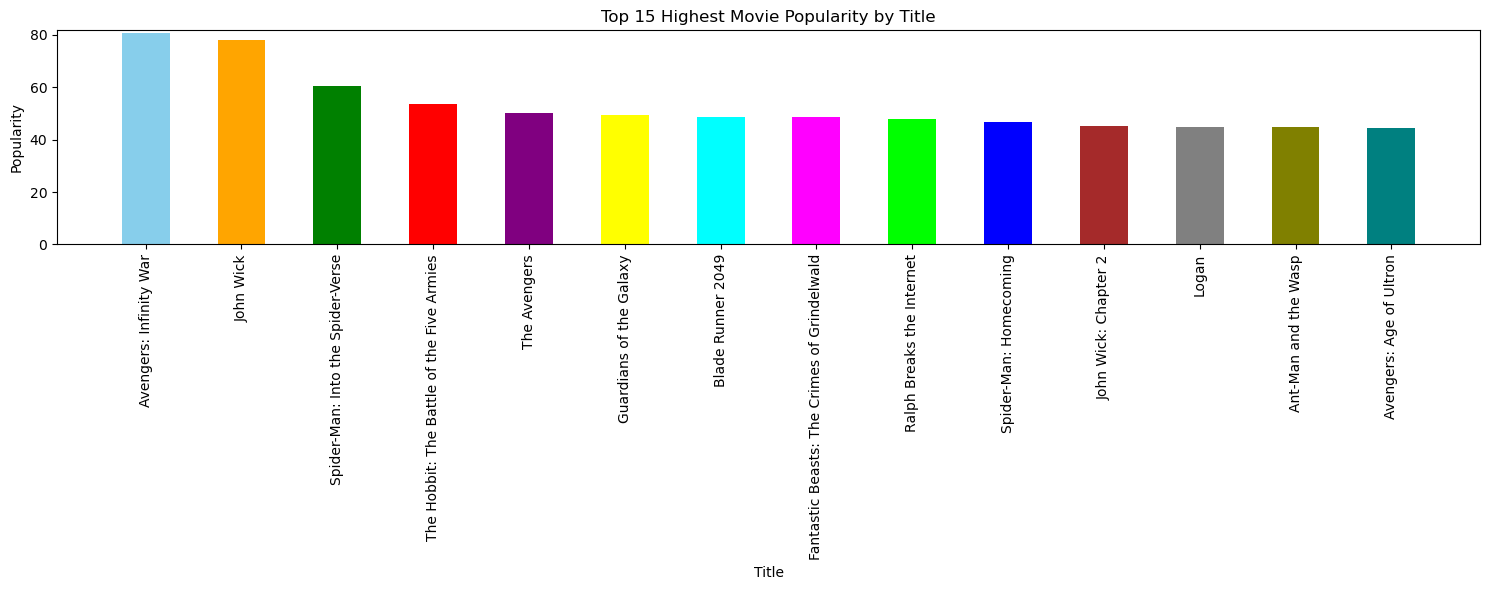

In [ ]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Sort movies by popularity in descending order
sorted_movies = movie_csv_df.sort_values(by='popularity', ascending=False)

# Select the top 15 highest titles by popularity
top_15_titles = sorted_movies.head(15)

# Define a list of colors for each movie
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'lime', 'blue', 'brown', 'gray', 'olive', 'teal']

# Plot the popularity of each movie title with a specific color and adjusted width
for i, (title, popularity) in enumerate(zip(top_15_titles['original_title'], top_15_titles['popularity'])):
    plt.bar(title, popularity, color=colors[i], width=0.5)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Top 15 Highest Movie Popularity by Title')
plt.xlabel('Title')
plt.ylabel('Popularity')

# Adjust y-axis range based on popularity values
plt.ylim(0, sorted_movies['popularity'].max() + 1)

# Show plot
plt.tight_layout()
plt.show()


print the 'genre_ids' with the highest movies after 'genre_maping'

In [ ]:
# Count the occurrences of each genre ID
genre_counts = movie_csv_df['genre_ids'].str.split(', ').explode().value_counts()

# Print the genre IDs with the highest number of movies
print("Genre IDs with the highest number of movies:")
for genre_id, count in genre_counts.items():
    print("Genre ID:", genre_id, "- Number of movies:", count)


Genre IDs with the highest number of movies:
Genre ID: [99] - Number of movies: 3700
Genre ID: [18 - Number of movies: 2655
Genre ID: [] - Number of movies: 2479
Genre ID: [18] - Number of movies: 2268
Genre ID: 53] - Number of movies: 2037
Genre ID: [35 - Number of movies: 1972
Genre ID: 18] - Number of movies: 1950
Genre ID: [35] - Number of movies: 1660
Genre ID: [28 - Number of movies: 1470
Genre ID: 18 - Number of movies: 1430
Genre ID: 10749] - Number of movies: 1262
Genre ID: [27] - Number of movies: 1145
Genre ID: 35] - Number of movies: 1112
Genre ID: [27 - Number of movies: 1064
Genre ID: [53 - Number of movies: 1053
Genre ID: 35 - Number of movies: 908
Genre ID: 27] - Number of movies: 905
Genre ID: 878] - Number of movies: 824
Genre ID: 10751] - Number of movies: 722
Genre ID: [99 - Number of movies: 707
Genre ID: [16 - Number of movies: 672
Genre ID: 53 - Number of movies: 637
Genre ID: 10770] - Number of movies: 625
Genre ID: 28 - Number of movies: 602
Genre ID: [10749 - 

In [ ]:
# Define a mapping of genre IDs from integer to string representations
genre_id_mapping = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    # Add more mappings as needed
}

# Count the occurrences of each genre ID
genre_counts = movie_csv_df['genre_ids'].str.split(', ').explode()

# Convert genre IDs to string representation or mark as 'Invalid' if conversion fails
genre_counts = genre_counts.apply(lambda x: genre_id_mapping.get(int(x), 'Invalid') if x.isdigit() else 'Invalid').value_counts()

# Print the genre IDs with the highest number of movies
print("Genre IDs with the highest number of movies:")
for genre_id, count in genre_counts.items():
    print("Genre:", genre_id, "- Number of movies:", count)


Genre IDs with the highest number of movies:
Genre: Invalid - Number of movies: 44931
Genre: Comedy - Number of movies: 908
Genre: Action - Number of movies: 602
Genre: Adventure - Number of movies: 542
Genre: Crime - Number of movies: 512
Genre: Animation - Number of movies: 339


QUESTION 3 
using the data frame movie_budgetscsv_df 
calculate the profit and profit margin
use columns 'worldwide_gross','production_budget'


In [105]:
movie_budgetcsv_df['production_budget'] = pd.to_numeric(movie_budgetcsv_df['production_budget'].astype(str).str.replace('$','').str.replace(',',''))
movie_budgetcsv_df['domestic_gross'] = pd.to_numeric(movie_budgetcsv_df['domestic_gross'].astype(str).str.replace('$','').str.replace(',',''))
movie_budgetcsv_df['worldwide_gross'] = pd.to_numeric(movie_budgetcsv_df['worldwide_gross'].astype(str).str.replace('$','').str.replace(',',''))
movie_budgetcsv_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


subtract 'production_budget' from 'worldwide_gross'


In [106]:
# Calculate profit
movie_budgetcsv_df['profit'] = movie_budgetcsv_df['worldwide_gross'] - movie_budgetcsv_df['production_budget']

# Display the DataFrame with the new 'profit' column
print(movie_budgetcsv_df.head())


   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross      profit  
0          425000000       760507625       2776345279  2351345279  
1          410600000       241063875       1045663875   635063875  
2          350000000        42762350        149762350  -200237650  
3          330600000       459005868       1403013963  1072413963  
4          317000000       620181382       1316721747   999721747  


In [ ]:
#print 25 movies with the highest profit ,include columns 'profit' , 'movie'

In [108]:
# Sort DataFrame by 'profit' column in descending order
sorted_df = movie_budgetcsv_df.sort_values(by='profit', ascending=False)

# Print the top 25 rows including columns 'profit' and 'movie' using .loc
print(sorted_df.loc[:, ['movie', 'profit']].head(25))


                                             movie      profit
0                                           Avatar  2351345279
42                                         Titanic  2008208395
6                           Avengers: Infinity War  1748134200
5             Star Wars Ep. VII: The Force Awakens  1747311220
33                                  Jurassic World  1433854864
66                                       Furious 7  1328722794
26                                    The Avengers  1292935897
260  Harry Potter and the Deathly Hallows: Part II  1216693157
41                                   Black Panther  1148258224
112                 Jurassic World: Fallen Kingdom  1135772799
155                                         Frozen  1122469910
134                           Beauty and the Beast  1099199706
672                                        Minions  1086336173
3                          Avengers: Age of Ultron  1072413963
425  The Lord of the Rings: The Return of the King  104

create a scatter graph to show the relationship between movies with a high profit. from the highest descending

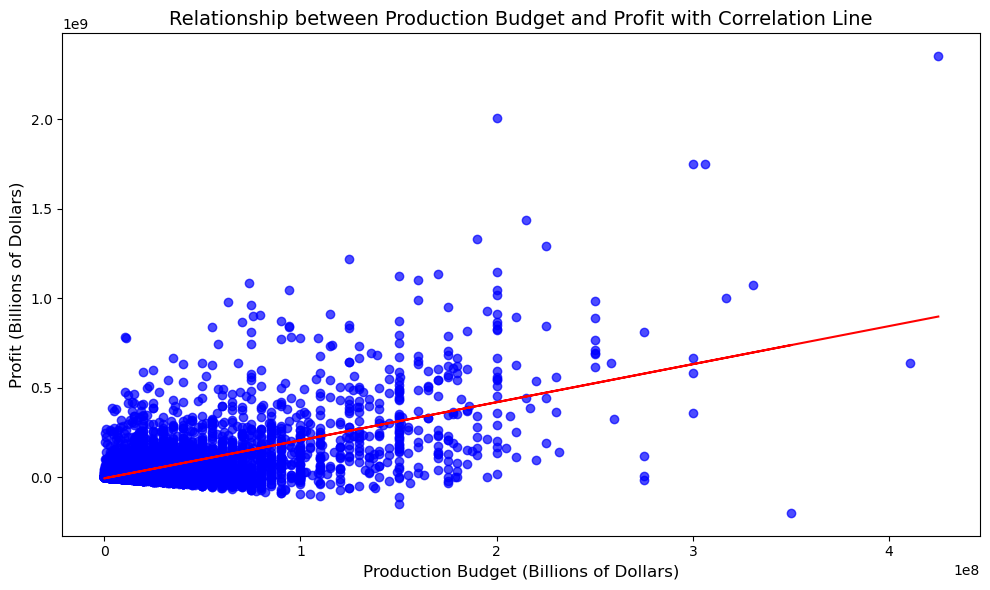

In [123]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))  # Adjust figure size

# Scatter plot
plt.scatter(sorted_df.loc[:, 'production_budget'], sorted_df.loc[:, 'profit'], color='blue', alpha=0.7)

# Add a line of best fit (correlation line)
m, b = np.polyfit(sorted_df.loc[:, 'production_budget'], sorted_df.loc[:, 'profit'], 1)  # Get slope and intercept
plt.plot(sorted_df.loc[:, 'production_budget'], m * sorted_df.loc[:, 'production_budget'] + b, color='red')

# Add labels and title
plt.xlabel('Production Budget (Billions of Dollars)', fontsize=12)
plt.ylabel('Profit (Billions of Dollars)', fontsize=12)
plt.title('Relationship between Production Budget and Profit with Correlation Line', fontsize=14)

plt.tight_layout()  # Adjust layout
plt.show()


calculate the correlation:

In [124]:
import numpy as np

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(sorted_df['production_budget'], sorted_df['profit'])[0, 1]

print("Correlation coefficient between production budget and profit:", correlation_coefficient)


Correlation coefficient between production budget and profit: 0.6087521471718846


show using a graph the relationshipn between the profit margin and release date

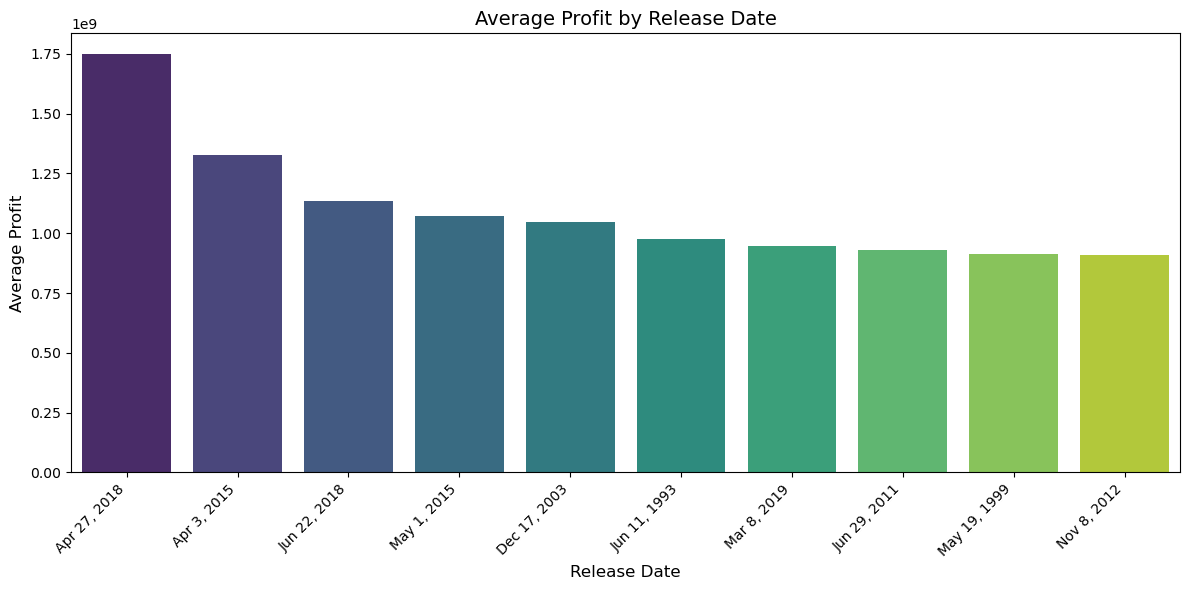

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average profit per release date
avg_profit_per_date = movie_budgetcsv_df.groupby('release_date')['profit'].mean().reset_index()

# Sort by profit to identify high-profit release dates
high_profit_dates = avg_profit_per_date.sort_values(by='profit', ascending=False).head(10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='release_date', y='profit', data=avg_profit_per_date, 
            palette='viridis', order=high_profit_dates['release_date'])

plt.xlabel('Release Date', fontsize=12)
plt.ylabel('Average Profit', fontsize=12)
plt.title('Average Profit by Release Date', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()
